In [2]:
# Form link : https://docs.google.com/forms/d/e/1FAIpQLSfmT0PMYiLtyLWwlSxgD5rn9ch_IscgZrfSuYeQDG8ydyG6qw/viewform

# Link to dataset : https://drive.google.com/file/d/1sbQ5WJ-KCPBrhT2YagtaARGoujCMpB8Q/view

# Resource-doc shared : https://docs.google.com/document/d/1E5cUtu6iaNxHblbw1TbX-7r8PC5uRcsnx9Z3ui-bFMg/

# SA-2023 WEEK 3 GRADED ASSIGNMENT

> Spaceship Titanic

Predict which passengers are transported to an alternate dimension

![](https://www.gannett-cdn.com/-mm-/682bf77435754aee88576469063388a7d8b07c2a/c=0-150-1280-873/local/-/media/2017/02/01/Reno/RGJ/636215634914521096-image001.jpg?width=660&height=373&fit=crop&format=pjpg&auto=webp)


### <b>Description</b>

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

### <b>Data description</b>

- Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- <code>PassengerId</code> - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- <code>HomePlanet</code> - The planet the passenger departed from, typically their planet of permanent residence.
- <code>CryoSleep</code> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- <code>Cabin</code> - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- <code>Destination</code> - The planet the passenger will be debarking to.
- <code>Age</code> - The age of the passenger.
- <code>VIP</code> - Whether the passenger has paid for special VIP service during the voyage.
- <code>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</code> - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- <code>Name</code> - The first and last names of the passenger.
- <code>Transported</code> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


### <b>Algorithm Documentation</b> (Highly recommended!)
- <code>Logistic Regression</code> : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- <code>SVM</code> : https://scikit-learn.org/stable/modules/svm.html
Confusion Matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- <code>Plot Confusion Matrix</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
- <code>ROC_AUC Score</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
- <code>Classification Report</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- <code>Label Encoder</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- <code>Label Binarizer</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
- <code>Standard Scaler</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- <code>Cross Val Score</code> : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Install Required Libraries</h1></span>

In [3]:
!pip install --upgrade scikit-learn  #There was an error with importing confusion_matrix from sklearn.mertices , so there was a need to upgrade it for google colab
# even after upgrading the plot_confusion_matrix didnt worked as it has been changed in new version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 29.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [4]:
## ======== YOUR CODE HERE ======== ##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,  classification_report
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

#### Read the data

In [5]:
df=pd.read_csv('data.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,Andromeda,39,False,0,0,0,0,0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,Andromeda,24,False,109,9,25,549,44,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,Andromeda,58,True,43,3576,0,6715,49,Altark Susent,False
3,0003_02,Europa,False,A/0/S,Andromeda,33,False,0,1283,371,3329,193,Solam Susent,False
4,0004_01,Earth,False,F/1/S,Andromeda,16,False,303,70,151,565,2,Willy Santantines,True


#### Check the shape of data. It should be  (8693, 14)

In [6]:
df.shape

(8693, 14)

#### Apply describe on dataframe

In [7]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.728517,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.355438,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


#### Check if there any null value in the dataset.

In [8]:
print(df.isnull().sum())
print("This clearly shows there are no null values (in any column)")

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64
This clearly shows there are no null values (in any column)


#### Number continuous and categorical features

In [9]:
categorical_features=[]
continuous_features=[]
for col in df.columns:
  if df[col].dtype=='O'or df[col].dtype=='bool':
    categorical_features.append(col)
  else:
    continuous_features.append(col)

print("Continous Features: ", continuous_features)
print("No. of Continuous features: ", len(continuous_features))

print("Categorical Features: ", categorical_features)
print("No. of Categorical Features: ", len(categorical_features))

Continous Features:  ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
No. of Continuous features:  6
Categorical Features:  ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Transported']
No. of Categorical Features:  8


#### Unique values

In [10]:
# Print the number of unique values of the categorical features

# Checking number of unique values for categorical columns
for col in categorical_features:
  print(col, ":" ,df[col].nunique())

# seeing the n-unique for passengerID , we can say there is no error and no overlap in passengerID as all are unique .
# But there is an anomaly as Name of passengers might overlap as not all of them are unique .

PassengerId : 8693
HomePlanet : 3
CryoSleep : 2
Cabin : 6560
Destination : 3
VIP : 2
Name : 8473
Transported : 2


<code>Note: If we apply one-hot-encoding to a categorical feature with many unique values, </code>
- Number of columns will be high
- Time required for training a model will be high
- We may not get usefull insights about the data

<code>This is the reason we are droping the features with more unique values.</code>


#### Drop the features

In [11]:
# Drop those categorical features which have more than 25 unique values

df.drop(['PassengerId' , 'Cabin' , 'Name'] , axis='columns', inplace=True)
df.shape

(8693, 11)

#### One Hot Encoding

In [12]:
# Hint: search for get_dummies

df=pd.get_dummies(data=df).astype(int)
# one hot encoding categorical columns
df.head()


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_Andromeda,Destination_Cygnus,Destination_Virgo
0,0,39,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,24,0,109,9,25,549,44,1,1,0,0,1,0,0
2,0,58,1,43,3576,0,6715,49,0,0,1,0,1,0,0
3,0,33,0,0,1283,371,3329,193,0,0,1,0,1,0,0
4,0,16,0,303,70,151,565,2,1,1,0,0,1,0,0


#### Changing bool columns to 0,1

In [13]:

df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['Transported'] = df['Transported'].astype(int)

df.head()



,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_Andromeda,Destination_Cygnus,Destination_Virgo
0,0,39,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,24,0,109,9,25,549,44,1,1,0,0,1,0,0
2,0,58,1,43,3576,0,6715,49,0,0,1,0,1,0,0
3,0,33,0,0,1283,371,3329,193,0,0,1,0,1,0,0
4,0,16,0,303,70,151,565,2,1,1,0,0,1,0,0


#### Split the data into train and test

In [14]:

X = df.drop(['Transported'],axis=1)
Y = df['Transported']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.15, random_state=2022)


In [15]:
print("X_train:", X_train.shape) # X_train
print("X_test:",X_test.shape) # X_test
print("y_train:",Y_train.shape) # y_train
print("y_test:",Y_test.shape) # y_test


X_train: (7389, 14)
X_test: (1304, 14)
y_train: (7389,)
y_test: (1304,)


#### Scale the data using Standard Scaler

In [16]:
## Use Standard Scaler to scale the train and test data

scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## <b>Logistic Regression</b>
#### Use default parameters unless mentioned

In [17]:
## Use Random state = 2021 and fit the LR model

lr =LogisticRegression(random_state=2021)
lr.fit(X_train_scaled , Y_train)

LogisticRegression(random_state=2021)

#### Plot confusion matrix

Since plot_confusion_matrix is not working we will plot the confusion matrix through matplotlib and seaborn

<Figure size 640x480 with 0 Axes>

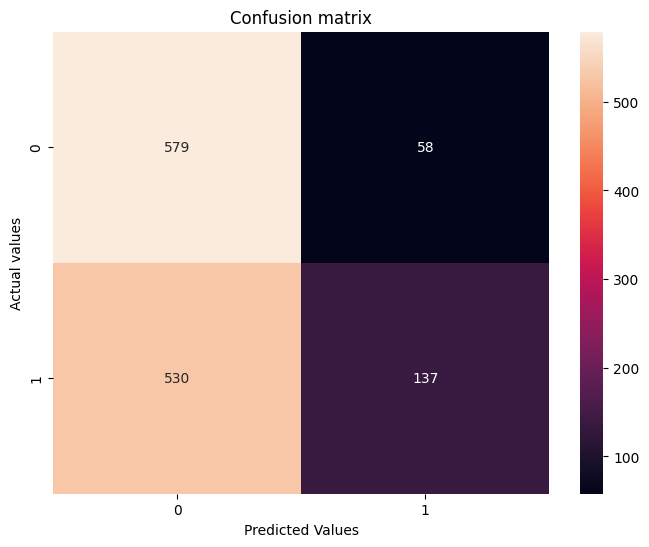

In [32]:
pred=lr.predict(X_test)
cm=confusion_matrix(Y_test ,pred)
fig=plt.figure()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.show()

# TP ->137
# TN ->579
# FN ->530 falsely  predicted as -ve
# FP -> 58 falsely predicted as positive
# considering +ve to be class =1 and -ve class=0

In [31]:
tn, fp, fn, tp=cm.ravel()
print("True negative: " , tn)
print("False negative: " , fn)
print("True positive: " , tp)
print("False positive: " , fp)

True negative:  506
false negative:  124
True positive:  543
false positive:  131


#### Print classification report

In [19]:
y_pred_lr = lr.predict(X_test_scaled)
print(classification_report(Y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.78      0.80      0.79       637
           1       0.81      0.79      0.80       667

    accuracy                           0.79      1304
   macro avg       0.79      0.79      0.79      1304
weighted avg       0.79      0.79      0.79      1304



#### Print accuracy score

In [20]:
print('Accuracy: ', accuracy_score(Y_test,y_pred_lr))

Accuracy:  0.7944785276073619


#### Print ROC-AUC score

In [21]:

## Note: Use predict_proba!!! Read documentation/google it
print(f'ROC-AUC Score: {roc_auc_score(Y_test, lr.predict_proba(X_test_scaled)[:, 1])}')

# model.predict_proba(X_test_scaled)
# This returns 2 d array with 2 columns representing the probability of 0 and 1 respectively..


ROC-AUC Score: 0.8771791498285394


#### Plot ROC-AUC Curve

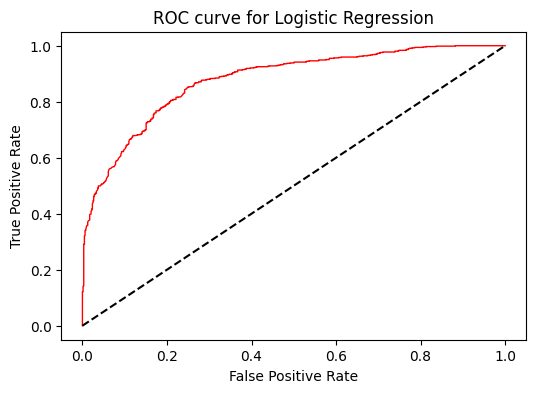

In [22]:
from sklearn.metrics import roc_curve
y_pred_proba_lr = lr.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba_lr[:,1])

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-r',linewidth=1)
# -r red line
plt.plot([0,1], [0,1], 'k--' )
# k-- black dashed line
# for random classifier
plt.title('ROC curve for Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()


#### Cross validation

In [23]:


## cv=5

scores = cross_val_score(lr, X_train_scaled, Y_train, cv = 5)
# we are calculating scores for 5 fold cross-validation

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')


Cross-validation scores: [0.78619756 0.79364005 0.76792963 0.80175913 0.7731889 ]
Average cross-validation score: 0.7845430566842235


## <b>SVM</b>
#### Use default parameters unless mentioned

In [24]:
clf_svm = SVC(random_state=2022, C=5, gamma='scale', kernel='rbf', probability=True)
# c checks for training testing error kindoff variance check
# gamma is responsible to check for shape of decision boundary , checks for overfit /underfit kind of bias check
# probability =True ensures that we calculate probability estimates since it will be required to use predict_proba in future calculations
clf_svm.fit(X_train_scaled, Y_train)


SVC(C=5, probability=True, random_state=2022)

#### Plot confusion matrix

<Figure size 640x480 with 0 Axes>

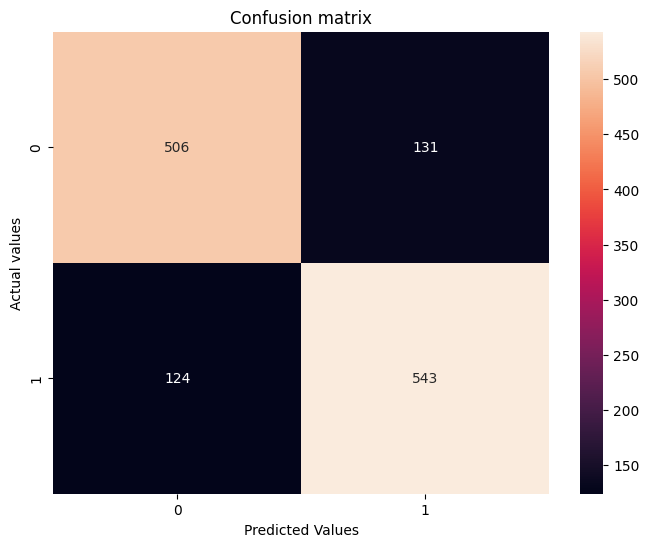

In [34]:
y_pred_svm=clf_svm.predict(X_test_scaled)
cm_svm=confusion_matrix(Y_test ,y_pred_svm)
fig=plt.figure()
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.show()

In [35]:
tn, fp, fn, tp=cm_svm.ravel()
print("True negative: " , tn)
print("False negative: " , fn)
print("True positive: " , tp)
print("False positive: " , fp)

True negative:  506
False negative:  124
True positive:  543
False positive:  131


#### Print classification report

In [26]:

print(classification_report(Y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.80      0.79      0.80       637
           1       0.81      0.81      0.81       667

    accuracy                           0.80      1304
   macro avg       0.80      0.80      0.80      1304
weighted avg       0.80      0.80      0.80      1304



#### Print accuracy score

In [27]:
print('Accuracy: ', accuracy_score(Y_test, y_pred_svm))
# Accuracy improved a bit

Accuracy:  0.8044478527607362


#### Print ROC-AUC score

In [28]:

## Note: Use predict_proba!!! Read documentation/google it
print(f'ROC-AUC Score: {roc_auc_score(Y_test, clf_svm.predict_proba(X_test_scaled)[:, 1])}')



ROC-AUC Score: 0.8687238013646239


#### Plot ROC-AUC curve

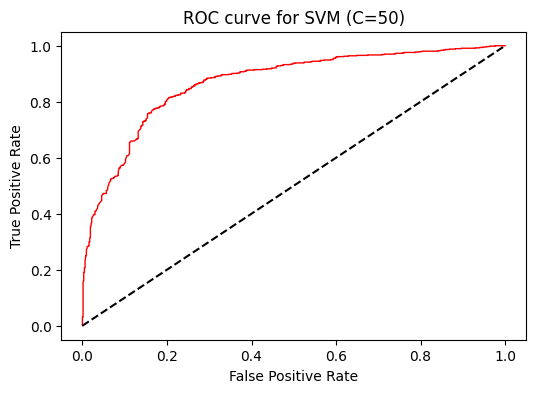

In [29]:

y_pred_svm_proba = clf_svm.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_svm_proba[:,1])

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-r',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for SVM (C=50)')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

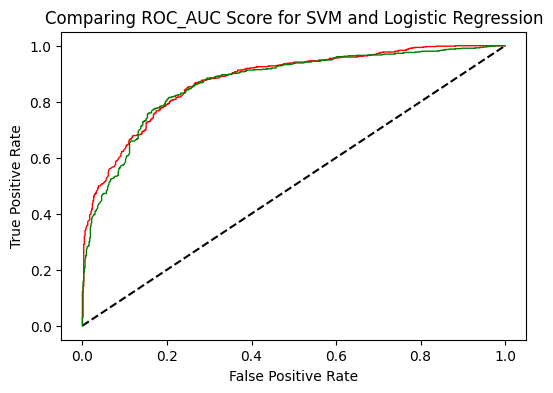

In [40]:
from sklearn.metrics import roc_curve
y_pred_proba_lr = lr.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba_lr[:,1])

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-r',linewidth=1)
# -r red line
plt.plot([0,1], [0,1], 'k--' )
# k-- black dashed line
# for random classifier
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')


y_pred_svm_proba = clf_svm.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_svm_proba[:,1])
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')

plt.title('Comparing ROC_AUC Score for SVM and Logistic Regression')
plt.show()


#### Cross validation

In [30]:

scores = cross_val_score(clf_svm, X_train_scaled, Y_train, cv = 5)
# 5 fold cross validation
print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')


Cross-validation scores: [0.79093369 0.78755074 0.76454668 0.80514208 0.77386594]
Average cross-validation score: 0.7844078303037189


1.ROC-AUC score which gives the area under the ROC curve is slightly greater for Logistic Regression Model than SVM suggesting its better performance in terms of ROC_AUC Score.

2.SVM's performance in terms of accuracy,precision and recall though seems to be slightly better than Logistic regression.

3.Average Cross Validation scores are nearly equal for 5 fold cross validation



# Congratulations! Assignment Completed!